<a href="https://colab.research.google.com/github/dungmike96/Python/blob/main/HM_Porfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🎯 Dự án Portfolio: Phân tích dữ liệu khách hàng H&M

#Import 1 số thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# **1.NHẬP & KIỂM TRA DỮ LIỆU**

In [5]:
#connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Check file có gì
import os
# Hiển thị danh sách tệp và thư mục trong Google Drive
drive_path = '/content/drive/My Drive/HM'
for root, dirs, files in os.walk(drive_path):
    for name in files:
        print(os.path.join(root, name))

/content/drive/My Drive/HM/articles_hm.csv
/content/drive/My Drive/HM/customer_hm.csv
/content/drive/My Drive/HM/transactions_hm.csv
/content/drive/My Drive/HM/articles_hm.gsheet


In [7]:
#1. Đọc dữ liệu
articles = pd.read_csv('/content/drive/My Drive/HM/articles_hm.csv')
customers = pd.read_csv('/content/drive/My Drive/HM/customer_hm.csv')
transactions = pd.read_csv('/content/drive/My Drive/HM/transactions_hm.csv')

# Kiểm tra nhanh
for df in [articles, customers, transactions]:
    display(df.head())
    print(df.info())
    print(df.isnull().sum())

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,1,1,ACTIVE,Regularly,52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   customer_id             1048575 non-null  object
 1   FN                      1048575 non-null  int64 
 2   Active                  1048575 non-null  int64 
 3   club_member_status      1048575 non-null  object
 4   fashion_news_frequency  1048574 non-null  object
 5   age                     1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB
None
customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64


,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec8f3f7163e192ad07ef,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37faccd5d9eb595d95ab,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc7137602898601df7597a,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c562ca3057570d6d8e6c4,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39f93a9f0be4a0c23eb4,742400033,0.003220,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1048575 non-null  object 
 1   customer_id       1048575 non-null  object 
 2   article_id        1048575 non-null  int64  
 3   price             1048575 non-null  float64
 4   sales_channel_id  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 40.0+ MB
None
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


# **2.KHAI PHÁ DỮ LIỆU(EDA)**

In [8]:
articles.isnull().sum(axis=0)
customers.isnull().sum(axis=0)
transactions.isnull().sum(axis=0)

,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


**2.1 CLEANING DATA**

In [9]:
# 2. Làm sạch dữ liệu
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
customers['club_member_status'] = customers['club_member_status'].fillna('UNKNOWN')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')


In [ ]:
customers[]

**2.2 KHÁM PHÁ DỮ LIỆU**

Top sản phẩm được mua nhiều:
article_id
706016001    1804
706016002    1453
372860001     979
464297007     846
706016003     818
759871002     811
562245046     801
673677002     786
156231001     747
568601006     738
Name: count, dtype: int64


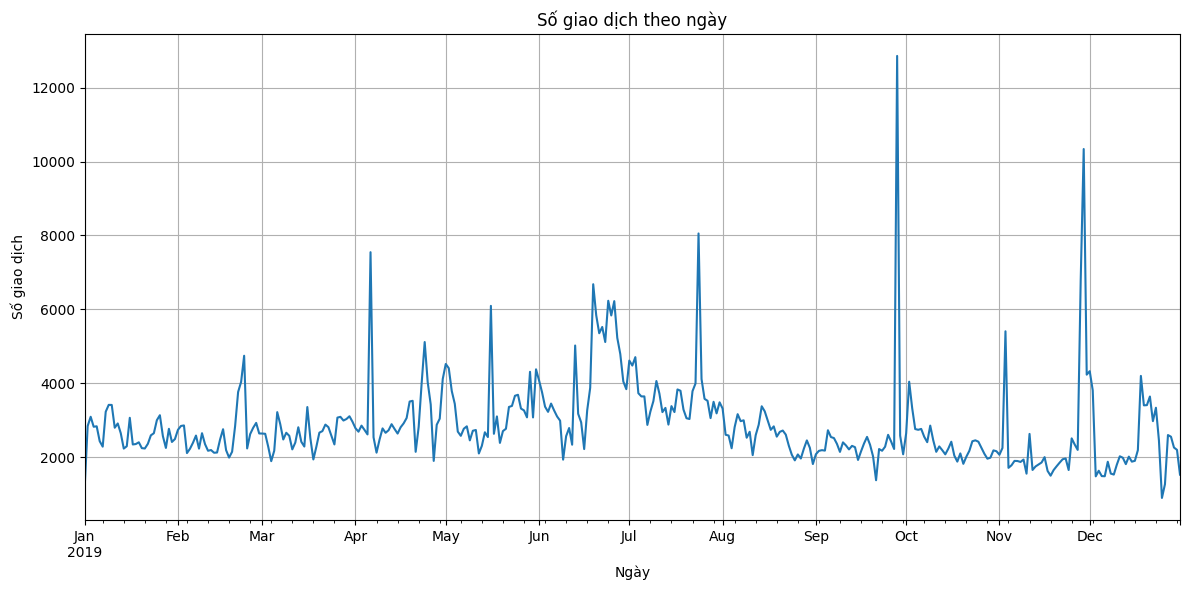

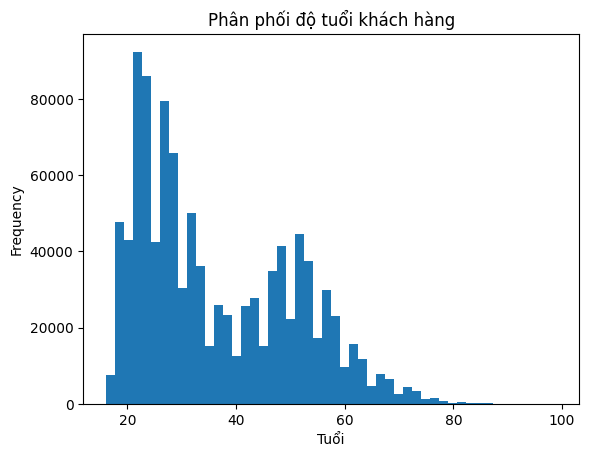

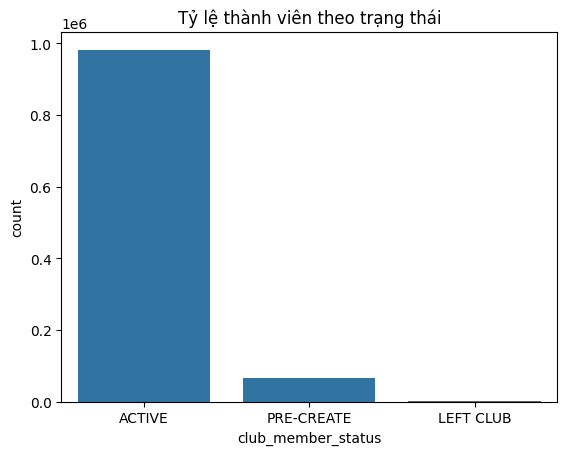

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    261053
           1       0.00      0.00      0.00     53520

    accuracy                           0.83    314573
   macro avg       0.41      0.50      0.45    314573
weighted avg       0.69      0.83      0.75    314573



In [10]:
# 3. Khám phá dữ liệu
print("Top sản phẩm được mua nhiều:")
print(transactions['article_id'].value_counts().head(10))

# Giao dịch theo ngày
transactions['t_dat'].value_counts().sort_index().plot(figsize=(12,6), title='Số giao dịch theo ngày')
plt.xlabel("Ngày")
plt.ylabel("Số giao dịch")
plt.grid(True)
plt.tight_layout()
plt.show()

# Phân phối độ tuổi khách hàng
customers['age'].plot(kind='hist', bins=50, title='Phân phối độ tuổi khách hàng')
plt.xlabel("Tuổi")
plt.show()

# Tỷ lệ thành viên
sns.countplot(data=customers, x='club_member_status')
plt.title('Tỷ lệ thành viên theo trạng thái')
plt.show()

# 4. Tạo nhãn khách quay lại
customer_purchase_count = transactions.groupby('customer_id').size()
repeat_customers = customer_purchase_count[customer_purchase_count > 1].index
customers['repeat_buyer'] = customers['customer_id'].isin(repeat_customers).astype(int)

# 5. Mô hình đơn giản dự đoán khách quay lại
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = pd.get_dummies(customers[['age', 'club_member_status']], drop_first=True)
y = customers['repeat_buyer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

Bước 1: Tính hệ số tương quan

In [ ]:
# Lấy những cột số từ bảng customers để tính tương quan
numeric_cols = customers.select_dtypes(include=[np.number])

# Tính ma trận tương quan
correlation_matrix = numeric_cols.corr()

# Hiển thị kết quả
print(correlation_matrix)

                    FN    Active       age  repeat_buyer
FN            1.000000  0.979559  0.034758      0.070263
Active        0.979559  1.000000  0.037793      0.073680
age           0.034758  0.037793  1.000000     -0.004918
repeat_buyer  0.070263  0.073680 -0.004918      1.000000


Bước 2: Vẽ biểu đồ heatmap tương quan

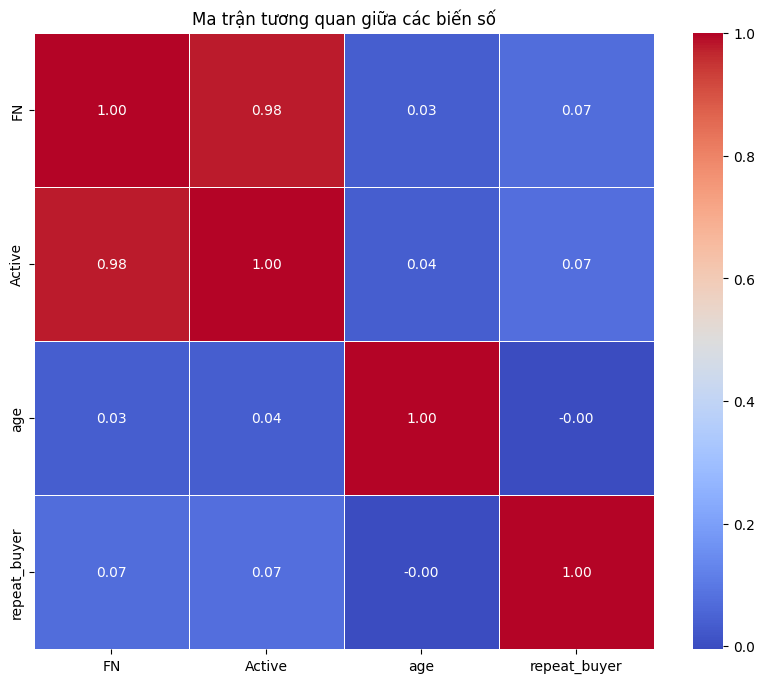

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()


In [ ]:
correlation_with_target = correlation_matrix['repeat_buyer'].sort_values(ascending=False)
print(correlation_with_target)


repeat_buyer    1.000000
Active          0.073680
FN              0.070263
age            -0.004918
Name: repeat_buyer, dtype: float64


Bước 1: Tạo đặc trưng từ bảng transactions

In [ ]:
# Tạo các đặc trưng giao dịch cho mỗi khách hàng
agg_df = transactions.groupby('customer_id').agg(
    total_transactions = ('article_id', 'count'),
    unique_purchase_days = ('t_dat', lambda x: x.nunique())
).reset_index()


Bước 2: Gộp với bảng customers

In [ ]:
# Merge lại với bảng customers
merged = pd.merge(customers, agg_df, on='customer_id', how='left')

# Với khách chưa có giao dịch thì điền 0
merged['total_transactions'] = merged['total_transactions'].fillna(0)
merged['unique_purchase_days'] = merged['unique_purchase_days'].fillna(0)


Bước 3: Tính tương quan

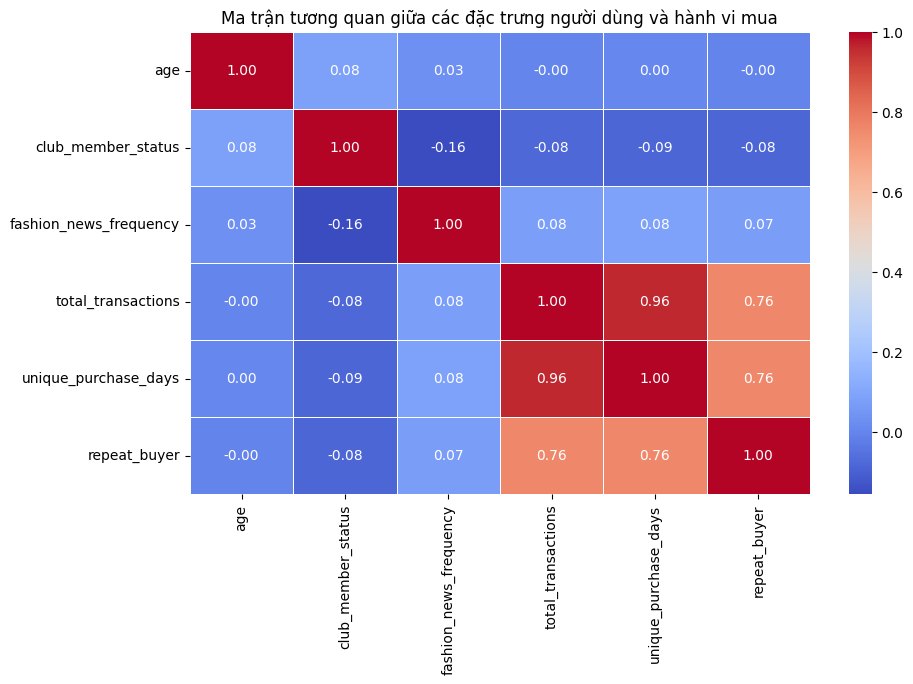

In [ ]:
# Chuyển biến phân loại thành số
merged['club_member_status'] = merged['club_member_status'].astype('category').cat.codes
merged['fashion_news_frequency'] = merged['fashion_news_frequency'].astype('category').cat.codes

# Tính tương quan
corr_matrix = merged[['age', 'club_member_status', 'fashion_news_frequency',
                      'total_transactions', 'unique_purchase_days', 'repeat_buyer']].corr()

# Hiển thị ma trận tương quan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các đặc trưng người dùng và hành vi mua")
plt.show()


**DATA MODELING**

In [ ]:
# Gộp transactions + customers
df = pd.merge(transactions, customers, on='customer_id', how='left')

# Gộp tiếp với articles để lấy thông tin sản phẩm
df = pd.merge(df, articles, on='article_id', how='left')

# Xem thử
df.head()


**TẠO BIẾN MỤC TIÊU**

In [ ]:
customer_purchase_count = df.groupby('customer_id').size()
repeat_customers = customer_purchase_count[customer_purchase_count > 1].index

# Thêm label vào bảng customers
customers['repeat_buyer'] = customers['customer_id'].isin(repeat_customers).astype(int)


BƯỚC 5: Rút trích đặc trưng (Feature Engineering)

In [ ]:
features = df.groupby('customer_id').agg(
    total_transactions=('article_id', 'count'),
    unique_days=('t_dat', lambda x: x.nunique())
).reset_index()


BƯỚC 6: Chuẩn bị mô hình

In [ ]:
# Merge với label
features = features.merge(customers[['customer_id', 'repeat_buyer']], on='customer_id')

# Loại bỏ customer_id
X = features.drop(['customer_id', 'repeat_buyer'], axis=1)
y = features['repeat_buyer']


BƯỚC 7: Training mô hình

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
